### Goal of this script: Obtain articles published per year and google trends interest per year. Z-score these two variables, run the correlation, and plot across time. Last Updated: 3/17/2023 by BM

In [20]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
import seaborn as sns
import scipy.stats as stats

In [21]:
# get all folders in a directory
f_1 = '/Users/benmuzekari/Desktop/Penn/Research/Other/AI/simg-b1734-s2023-03-17/'
folders = os.listdir(f_1)
df = pd.read_csv(f_1 + folders[0] + '/' + [i for i in os.listdir(f_1+ folders[0]) if i.endswith('.csv')][0])
for f_2 in folders[1:]:
    if (f_2 == '.DS_Store') | (f_2 == 'README.md') | (f_2 == 'search_records'):
        continue
    else:
        file = [i for i in os.listdir(f_1+ f_2) if i.endswith('.csv')][0]
        df_temp = pd.read_csv(f_1+ f_2 + '/' + file)
        df = pd.concat([df, df_temp], axis=0)
        
# import google trends data
google_trends_df = pd.read_csv('/Users/benmuzekari/Desktop/Penn/Research/Other/AI/Google_Trends_AI.csv', header = 0)

In [22]:
# wrangle and merge data
df['Date'] = df['Date'].str[:-3]
count_df = pd.DataFrame(df.groupby(['Date']).size())
merged_df = count_df.merge(google_trends_df, how = 'inner', on = ['Date'])
merged_df.rename(columns={0: 'Count'}, inplace=True)
merged_df = merged_df[~merged_df.Date.str.contains("2023")]

In [23]:
# z score data
merged_df['Count_z'] = stats.zscore(merged_df['Count'])
merged_df['Interest_z'] = stats.zscore(merged_df['Interest'])

In [24]:
# get correlation
merged_df.corr()

,Count,Interest,Count_z,Interest_z
Count,1.000000,0.758383,1.000000,0.758383
Interest,0.758383,1.000000,0.758383,1.000000
Count_z,1.000000,0.758383,1.000000,0.758383
Interest_z,0.758383,1.000000,0.758383,1.000000


In [25]:
# plot over time
# sns.lineplot(data=merged_df, x="Date", y="Count", color="#903A27")
# sns.lineplot(data=merged_df, x="Date", y="Interest", color="#277D90")

In [26]:
# now lets wrangle and merge data at year level
df['Date'] = df['Date'].str[:-3]
count_df = pd.DataFrame(df.groupby(['Date']).size())
google_trends_df['Date'] = google_trends_df['Date'].str[:-3]
merged_df = count_df.merge(google_trends_df, how = 'inner', on = ['Date'])
merged_df.rename(columns={0: 'Count'}, inplace=True)

In [27]:
# clean and z-score
merged_df = merged_df[~merged_df.Date.str.contains("2023")]
merged_df['Count_z'] = stats.zscore(merged_df['Count'])
merged_df['Interest_z'] = stats.zscore(merged_df['Interest'])
merged_df.groupby(['Date']).mean()

,Count,Interest,Count_z,Interest_z
Date,,,,
2004,144.0,61.500000,-0.729955,1.352371
2005,128.0,43.166667,-0.761584,0.251298
2006,117.0,30.416667,-0.783328,-0.514449
2007,103.0,25.916667,-0.811003,-0.784712
2008,98.0,23.916667,-0.820887,-0.904829
2009,71.0,26.000000,-0.874260,-0.779707
2010,95.0,22.750000,-0.826817,-0.974898
2011,145.0,26.083333,-0.727978,-0.774702
2012,153.0,21.500000,-0.712164,-1.049971


In [28]:
# get correlation
merged_df.corr()

,Count,Interest,Count_z,Interest_z
Count,1.000000,0.758302,1.000000,0.758302
Interest,0.758302,1.000000,0.758302,1.000000
Count_z,1.000000,0.758302,1.000000,0.758302
Interest_z,0.758302,1.000000,0.758302,1.000000


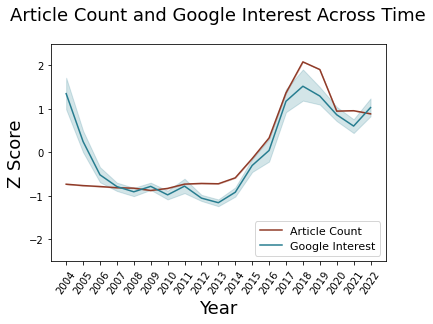

In [29]:
# plot over time
sns.lineplot(data=merged_df, x="Date", y="Count_z", color="#903A27", label='Article Count')
sns.lineplot(data=merged_df, x="Date", y="Interest_z", color="#277D90", label='Google Interest')
plt.ylabel("Z Score", fontsize=18, font="Ubuntu")
plt.xlabel("Year", fontsize=18)
plt.ylim(-2.5, 2.5)
plt.legend(loc='lower right', prop={'size': 11})
plt.xticks(rotation=55)
plt.title('Article Count and Google Interest Across Time', fontsize=18, y=1.08)
plt.savefig('article_count_and_google_interest_time.pdf', bbox_inches='tight')